### 色彩
人眼感知色彩的基本机制通过视觉器官-视锥细胞完成,它包括三种类型:红色感受器,绿色感受器,蓝色感受器.它们分别对应于不同波长的光,当光线进入眼睛并刺激视网膜上的视锥细胞时,它们会产生相应的神经信号,传递到大脑的视觉皮层


### 色彩模式
- RGB:用红,绿,蓝三种原色以不同的强度混合创建各种色彩
- CMYK:青,洋红,黄和黑四种颜色的墨水混合创建各种色彩
- HSL/HSV:色调色彩位置,饱和度表示色彩纯度亮度,亮度/明度表示色彩的亮暗程度

color=(0,0,1,0,5) RGBA
> alpha 代表透明度

> https://matplotlib.org/stable/gallery/color/named_colors.html

### HSV
色调(hue),饱和度(saturation),明暗度(value).

matplotlib.color.hsv_to_rgb()将hsv转换为rgb;matplotlib.color.rgb_to_hsv()将rgb转换为hsv

- 色调 hue:取值一般用角度,范围0-360
- 饱和度 saturation:0-100,值越大颜色越艳丽
- 明暗度 value:0-100黑

### 颜色映射
颜色映射,也叫色谱指将数值映射到颜色的一种关系.默认色谱viridis

> value(0,1)=>[rd,bu]

> value(min,max)=>normalize(0,1)=>[rd,bu]

> https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys

### 平面散点RGB

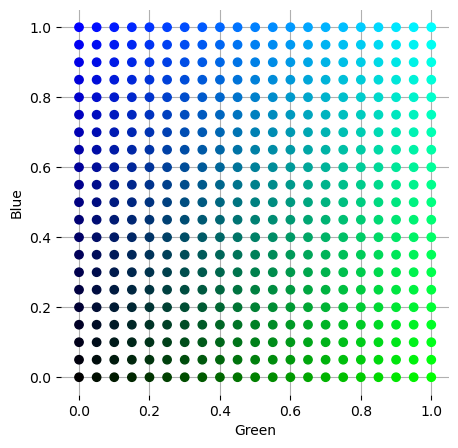

In [2]:
num_point=21
# 红绿渐变
Green_array=np.linspace(0,1,num_point)
Blue_array=np.linspace(0,1,num_point)

GG,BB=np.meshgrid(Green_array,Blue_array)

RR=np.zeros_like(GG)

RGB_color=np.vstack([RR.ravel(),GG.ravel(),BB.ravel()]).T

fig,ax=plt.subplots(figsize=(5,5))

ax.scatter(GG,BB,c=RGB_color)

ax.set_xlabel('Green')
ax.set_ylabel('Blue')

ax.set_yticks(np.linspace(0,1,6))
ax.set_xticks(np.linspace(0,1,6))

ax.grid((0.8,0.8,0.8))

ax.set_axisbelow(True)

ax.spines[['top','right','bottom','left']].set_visible(False)

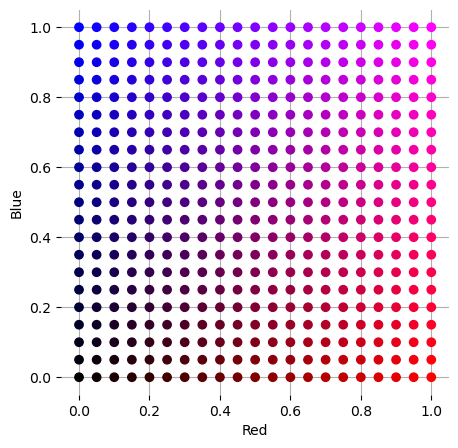

In [3]:
# 红蓝渐变
Red_array=np.linspace(0,1,num_point)
Blue_array=np.linspace(0,1,num_point)

Red,Blue=np.meshgrid(Red_array,Blue_array)
Green=np.zeros_like(Red)

RGB_color=np.vstack([Red.ravel(),Green.ravel(),Blue.ravel()]).T

fig,ax=plt.subplots(figsize=(5,5))

ax.scatter(Red,Blue,c=RGB_color)

ax.set_xlabel('Red')
ax.set_ylabel('Blue')

ax.set_xticks(np.linspace(0,1,6))
ax.set_yticks(np.linspace(0,1,6))

ax.spines[['top','bottom','left','right']].set_visible(False)

ax.grid((0.8,0.8,0.8))

ax.set_axisbelow(True)

### 三维空间散点

In [4]:
# 生成网格数据

def color_cubic(num):
    x1=np.linspace(0,1,num)
    x2=np.linspace(0,1,num)
    x3=np.linspace(0,1,num)

    xx,yy,zz=np.meshgrid(x1,x2,x3)
    color_all=np.column_stack([xx.ravel(),yy.ravel(),zz.ravel()])
    # 利用面具 做筛选,仅仅保留立方体朝外的
    # 颜色相对较鲜亮的
    color_bright=color_all[np.any(color_all==1,axis=1)]

    # 颜色相对较暗沉的
    color_dark=color_all[np.any(color_all==0,axis=1)]
    return color_all,color_bright,color_dark


/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_1837/3705528415.py:37: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_1837/3705528415.py:38: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_1837/3705528415.py:39: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
/var/folders/m4/fgyn19bn1cb4vzrvd9hbd2xr0000gn/T/ipykernel_1837/3705528415.py:42: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis ins

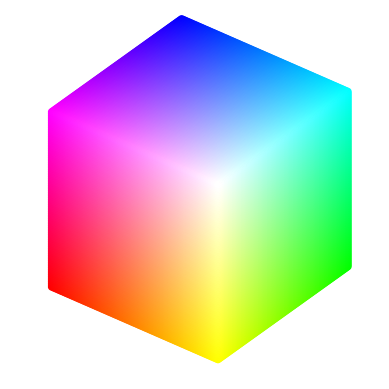

In [5]:
color_all,color_bright,color_dark=color_cubic(101)

ax=plt.subplot(111,projection='3d')


ax.scatter(color_bright[:,0],color_bright[:,1],color_bright[:,2]
           ,c=color_bright,alpha=1)

ax.view_init(azim=38,elev=34)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

#不显示轴背景
ax.xaxis.pane.fill=False
ax.yaxis.pane.fill=False
ax.zaxis.pane.fill=False

# 图脊设置白色
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

ax.grid(False)

# 设置正焦投影
ax.set_proj_type('ortho')
# 等比例成像
ax.set_box_aspect(aspect=(1,1,1))

# Transparent spines 透明
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))

# Transparent panes
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))



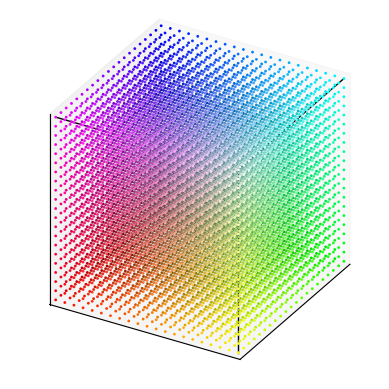

In [10]:
# 散点稀疏
color_all,color_bright,color_dark=color_cubic(21)
line1_x=[1,1]
line1_y=[1,1]
line1_z=[1,0]

line2_x=[1,1]
line2_y=[1,0]
line2_z=[1,1]

line3_x=[1,0]
line3_y=[1,1]
line3_z=[1,1]

fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(color_all[:,0],color_all[:,1],color_all[:,2],
           c=color_all,s=1,alpha=1)

ax.view_init(azim=30,elev=30)

ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_zlim(0,1)

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.plot(line1_x,line1_y,line1_z,alpha=1,lw=1,color='k')
ax.plot(line2_x,line2_y,line2_z,alpha=1,lw=1,color='k')
ax.plot(line3_x,line3_y,line3_z,alpha=1,lw=1,color='k')

ax.set_proj_type('ortho')
ax.set_box_aspect(aspect=(1,1,1))

In [ ]:
# 艳丽版本

### 绘制六个侧面,三维散点

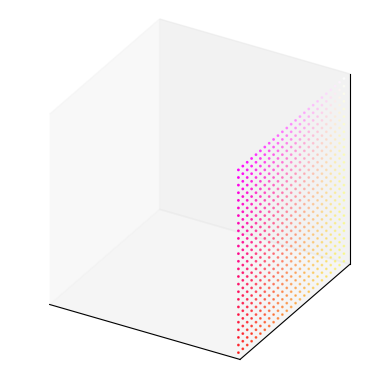

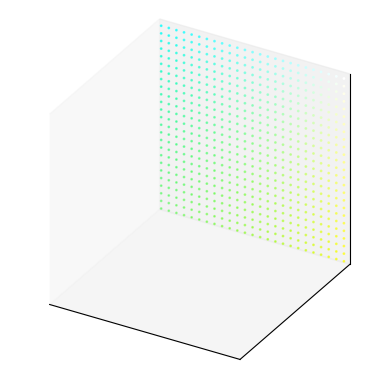

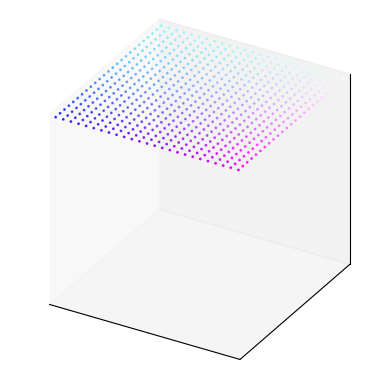

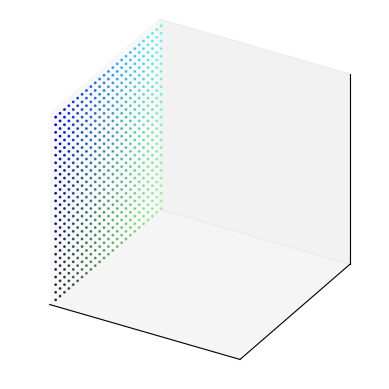

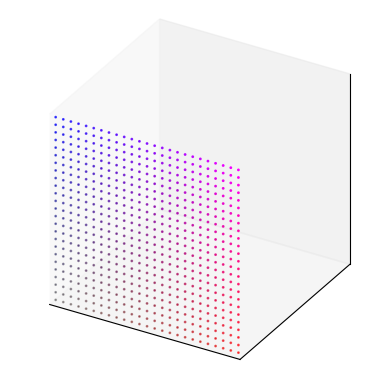

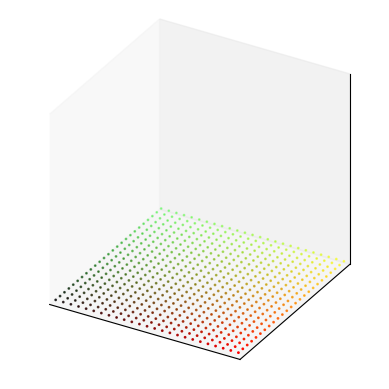

In [14]:
color_all,color_bright,color_dark=color_cubic(25)

# 取出颜色6个面
# color_all[:,0]==1代表面具mask条件第一列(红色)为1
color_face_6=[color_all[color_all[:,0]==1]
            ,color_all[color_all[:,1]==1]
            ,color_all[color_all[:,2]==1]
            ,color_all[color_all[:,0]==0]
            ,color_all[color_all[:,1]==0]
            ,color_all[color_all[:,2]==0]]

for index,face in enumerate(color_face_6):
    fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
    ax.scatter(face[:,0],face[:,1],face[:,2],
               s=1,c=face)
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.grid(False)
    ax.set_proj_type('ortho')
    ax.set_box_aspect(aspect=(1,1,1))

### 切豆腐展示RGB渐变

In [7]:
def color_cubic(num):
    x1=np.linspace(0,1,num)
    x2=x1
    x3=x1

    xx1,xx2,xx3=np.meshgrid(x1,x2,x3)

    color_all=np.column_stack([xx1.ravel(),xx2.ravel(),xx3.ravel()])

    bright=color_all[np.any(color_all==1,axis=1)]
    dark=color_all[np.any(color_all==0,axis=1)]
    return color_all,bright,dark

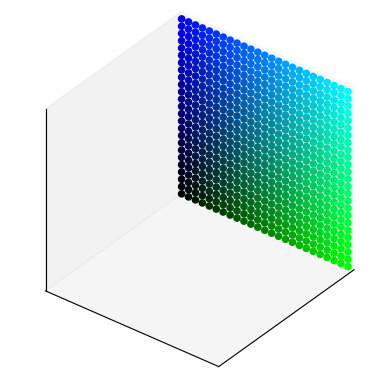

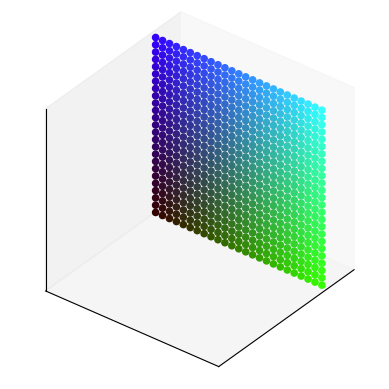

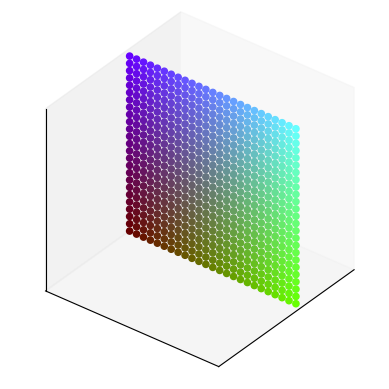

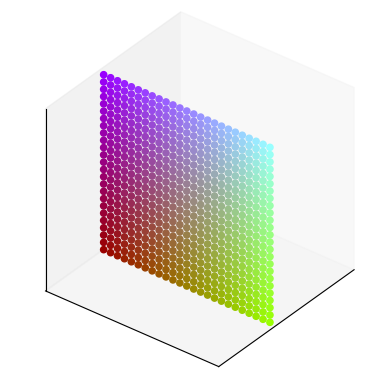

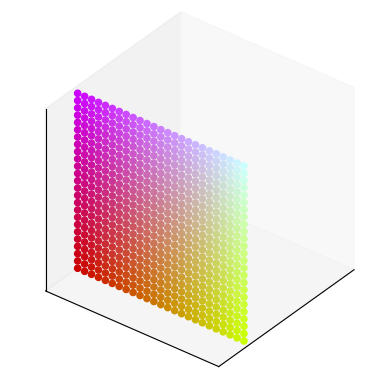

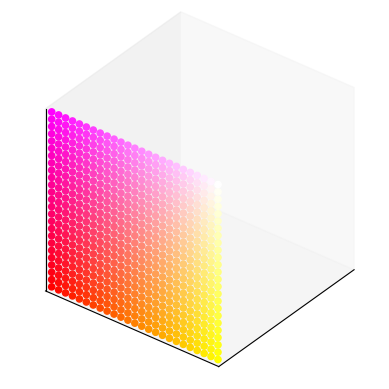

In [22]:
# 红色渐变切片
color_all,bright,dark=color_cubic(25)

color=color_all[color_all[:,0]==0]

face_num=np.linspace(0,1,6)

for i in face_num:
    fig,ax=plt.subplots(subplot_kw={'projection':'3d'})
    color_copy=np.copy(color)
    color_copy[:,0]=color_copy[:,0]+i
    ax.scatter(color_copy[:,0],color_copy[:,1],color_copy[:,2]
               ,c=color_copy,alpha=1)
    
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_zlim(0,1)
    
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])

    ax.set_proj_type('ortho')
    ax.set_box_aspect(aspect=(1,1,1))
    ax.view_init(azim=38,elev=34)


In [ ]:
# 绿色渐变切片

In [ ]:
# 蓝色渐变切片

### 指定色号和平面散点图可视化HSV色彩空间

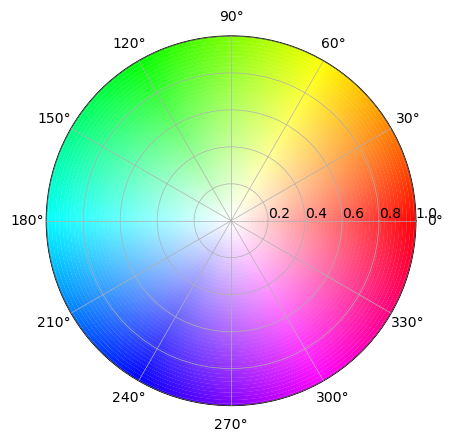

In [7]:
# 极坐标系-圆
def polar_circles(num_r,num_n):
    # 极径[0,1]分成若干等份
    r_array=np.linspace(0,1,num_r)

    # 极角[0,2*pi]分成若干等份
    t_array=np.linspace(0,2*np.pi,num_n,endpoint=False)

    rr,tt=np.meshgrid(r_array,t_array)
    # 生成极坐标系
    circles=np.column_stack([rr.ravel(),tt.ravel()])

    return circles

# hsv色号三值也会转换[0,1]

def plot_HSV_polar(value=1,num_r=21,num_n=21):
    circles=polar_circles(num_r,num_n)

    # 极角
    RHO=circles[:,0]
    # 极径
    PHI=circles[:,1]

    # 饱和度  
    s_=RHO

    # 色调转换为[0,1]
    h_=(PHI-PHI.min())/(PHI.max()-PHI.min())

    # 饱和度
    v_=np.ones_like(RHO)*value

    h,s,v=h_.flatten().tolist(),s_.flatten().tolist(),v_.flatten().tolist()
    
    c=[colorsys.hsv_to_rgb(*x) for x in zip(h,s,v)]

    fig,ax=plt.subplots(subplot_kw={'projection':'polar'})
    
    ax.scatter(PHI,RHO,c=c,s=3,alpha=1)

    ax.set_xticks(np.linspace(0,2*np.pi,12,endpoint=False))

    ax.tick_params('both',grid_linewidth=0.5)

    ax.set_rlim(0,1)
    ax.set_rlabel_position(0)
    ax.set_axisbelow(False)

plot_HSV_polar(value=1,num_r=51,num_n=780)
